In [1]:
import pandas as pd
import numpy as np
import nltk 
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
tqdm.pandas()
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
import nltk
nltk.download('words')
nltk.download('stopwords')
words = nltk.corpus.words.words()
sw = stopwords.words('english')

[nltk_data] Downloading package words to /Users/ybchoi/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ybchoi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### import combined_text reviews

In [6]:
dft = pd.read_csv('df_combined_text.csv')
dft

,Unnamed: 0,asin,reviewText,overall_avg,Target
0,0,000254CDA01E5AE839E7EE3F6FC1D2F1,The child who recieved them opened the box and...,4.625000,1
1,1,0002E81AED1B9840434EE28E39876BE4,Great gift for my special needs cousin Blocks ...,2.538462,0
2,2,0003806D9BE7957D8AB9AF9EC04F52D0,I needed something to occupy kids indoors that...,5.000000,1
3,3,00049B538C925B3EF702FFF6FBD48DFE,This is a very nicely detailed and painted die...,4.625000,1
4,4,0004D0377FDC88F2DD349170E36324E7,Cute This bear is so cool and cute. The fabric...,5.000000,1
...,...,...,...,...,...
63012,63012,FFFAB16CD5964F60F014EFAA1210AFEE,These stickers are really adorable. The variet...,4.928571,1
63013,63013,FFFAB94C16EAEC9E1DEBF24E231C53BB,"great little toy. <div id=""video-block-R3SMI4X...",4.380952,0
63014,63014,FFFB0C64CBC232115CE8FFF2BE870122,I am a collector of everything Firefly / Seren...,4.850000,1
63015,63015,FFFB5BB91B42C9A34457AD075B499DF9,"This made a cute Easter gift, but was soon for...",4.090909,0


### create and test BoW n-grams  

In [25]:
# create a count vectorizer object
token = RegexpTokenizer(r'[a-zA-Z]+')
bigram = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)

# fit the count vectorizer  - to make bigrams
bigram_counts = bigram.fit_transform(dft['reviewText'])

# collect the vocabulary items used in the vectorizer
# dictionary = count_vectorizer.vocabulary_.items()

# words appear in documents.
bigram_tokens = bigram.get_feature_names()
#print(tokens)

In [27]:
# split traning data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    bigram_counts, dft['Target'], test_size=0.2, random_state=1)

In [21]:
#Import model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
#Create a Classifier
clf2 = LogisticRegression(C=1, penalty='l1', solver='liblinear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)
# print(y_pred)
print("LASSO-LR Accuracy:",metrics.accuracy_score(y_test, y_pred2))
# print(clf.decision_function(X_test))
# print(clf.predict_proba(X_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

LASSO-LR Accuracy: 0.7516661377340527
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      5774
           1       0.76      0.80      0.78      6830

    accuracy                           0.75     12604
   macro avg       0.75      0.75      0.75     12604
weighted avg       0.75      0.75      0.75     12604



In [28]:
# from sklearn.model_selection import cross_val_score ## for cross-validation
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

MultinomialNB Accuracy: 0.732783243414789
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      5774
           1       0.72      0.83      0.77      6830

    accuracy                           0.73     12604
   macro avg       0.74      0.72      0.72     12604
weighted avg       0.74      0.73      0.73     12604



In [19]:
# create a count vectorizer object
token = RegexpTokenizer(r'[a-zA-Z]+')
trigram = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)

# fit the count vectorizer  - to make trigrams
trigram_counts = trigram.fit_transform(dft['reviewText'])

# collect the vocabulary items used in the vectorizer
# dictionary = count_vectorizer.vocabulary_.items()

# words appear in documents.
trigram_tokens = trigram.get_feature_names()
#print(tokens)

In [22]:
# split traning data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    trigram_counts, dft['Target'], test_size=0.2, random_state=1)

In [23]:
#Import model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
#Create a Classifier
clf2 = LogisticRegression(C=1, penalty='l1', solver='liblinear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)
# print(y_pred)
print("LASSO-LR Accuracy:",metrics.accuracy_score(y_test, y_pred2))
# print(clf.decision_function(X_test))
# print(clf.predict_proba(X_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

LASSO-LR Accuracy: 0.7520628371945414
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      5774
           1       0.76      0.80      0.78      6830

    accuracy                           0.75     12604
   macro avg       0.75      0.75      0.75     12604
weighted avg       0.75      0.75      0.75     12604



In [26]:
# from sklearn.model_selection import cross_val_score ## for cross-validation
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

MultinomialNB Accuracy: 0.732783243414789
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      5774
           1       0.72      0.83      0.77      6830

    accuracy                           0.73     12604
   macro avg       0.74      0.72      0.72     12604
weighted avg       0.74      0.73      0.73     12604



In [29]:
# create a count vectorizer object
token = RegexpTokenizer(r'[a-zA-Z]+')
quadrigram = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)

# fit the count vectorizer  - to make quadrigrams
quadrigram_counts = quadrigram.fit_transform(dft['reviewText'])

# collect the vocabulary items used in the vectorizer
# dictionary = count_vectorizer.vocabulary_.items()

# words appear in documents.
quadrigram_tokens = bigram.get_feature_names()
#print(tokens)

In [30]:
# split traning data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    quadrigram_counts, dft['Target'], test_size=0.2, random_state=1)

In [31]:
#Import model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
#Create a Classifier
clf2 = LogisticRegression(C=1, penalty='l1', solver='liblinear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)
# print(y_pred)
print("LASSO-LR Accuracy:",metrics.accuracy_score(y_test, y_pred2))
# print(clf.decision_function(X_test))
# print(clf.predict_proba(X_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

LASSO-LR Accuracy: 0.7517454776261504
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      5774
           1       0.76      0.80      0.78      6830

    accuracy                           0.75     12604
   macro avg       0.75      0.75      0.75     12604
weighted avg       0.75      0.75      0.75     12604



In [32]:
# from sklearn.model_selection import cross_val_score ## for cross-validation
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

MultinomialNB Accuracy: 0.732783243414789
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      5774
           1       0.72      0.83      0.77      6830

    accuracy                           0.73     12604
   macro avg       0.74      0.72      0.72     12604
weighted avg       0.74      0.73      0.73     12604



### Visualizing n-grams as wordclouds by target class

In [134]:
##source: https://www.kaggle.com/peterwittek/wordclouds-of-titles-and-abstracts-with-n-grams
## source: https://medium.com/@jiayangcheng21/creating-bigram-and-trigram-word-cloud-for-ios-app-reviews-using-pythons-nltk-natural-language-55eaec5997af
###source: https://www.datacamp.com/community/tutorials/wordcloud-python

import nltk
from wordcloud import WordCloud, STOPWORDS

#subsetting data by target class
dft_classOne = dft[dft['Target']==1]
#dft_classOne.head()
dft_classZero = dft[dft['Target']==0]
#dft_classZero.head()

text_classOne = " ".join(review for review in dft_classOne['reviewText'])
print ("There are {} words in the combination of all review.".format(len(text_classOne)))

text_classZero = " ".join(review for review in dft_classZero['reviewText'])
print ("There are {} words in the combination of all review.".format(len(text_classZero)))

There are 168055882 words in the combination of all review.
There are 165461481 words in the combination of all review.


In [135]:
#generate wordclouds

wordcloud_quadri_classOne = WordCloud(background_color ='white', collocation_threshold = 4).generate(text_classOne)

wordcloud_quadri_classZero = WordCloud(background_color ='white', collocation_threshold = 4).generate(text_classZero)

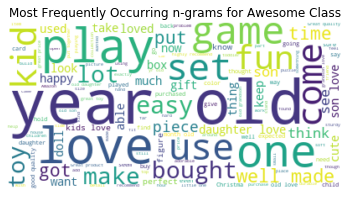

In [136]:
#import matplotlib.pyplot as plt
# Display the generated world cloud image for target class == 1
plt.title('Most Frequently Occurring n-grams for Awesome Class')
plt.imshow(wordcloud_quadri_classOne, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud_quadri_classOne.to_file("WordCloud_Awsome.png")

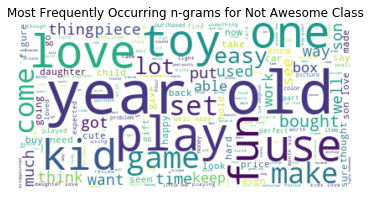

In [138]:
# Display the generated world cloud image for target class == 0
plt.title('Most Frequently Occurring n-grams for Not Awesome Class')
plt.imshow(wordcloud_quadri_classZero, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud_quadri_classZero.to_file("WordCloud_notAwsome.png")

### Bagging

In [ ]:
##source: https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

seed = 1075
np.random.seed(seed)

#Create a Classifier
clf = LogisticRegression(C=1, penalty='l1', solver='liblinear') # Linear Kernel

In [ ]:
#with max-sample 0.2
bagging_clf = BaggingClassifier(clf, max_samples=0.2, max_features=10, random_state=seed)
bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
   
bagging_clf.fit(X_train.toarray(), y_train)
y_pred_bagg = bagging_clf.predict(X_test.toarray())
print('Logit-Bagging at .2 subsamples')
print(classification_report(y_test,y_pred_bagg))

In [ ]:
#with max-sample 0.3
bagging_clf = BaggingClassifier(clf, max_samples=0.3, max_features=10, random_state=seed)
bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
   
bagging_clf.fit(X_train.toarray(), y_train)
y_pred_bagg = bagging_clf.predict(X_test.toarray())
print('Logit-Bagging at .3 subsamples')
print(classification_report(y_test,y_pred_bagg))

In [ ]:
#with max-sample 0.4

bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
   
bagging_clf.fit(X_train.toarray(), y_train)
y_pred_bagg = bagging_clf.predict(X_test.toarray())
print('Logit-Bagging')
print(classification_report(y_test,y_pred_bagg))

In [ ]:
#with max-sample 0.5
bagging_clf = BaggingClassifier(clf, max_samples=0.5, max_features=10, random_state=seed)
bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
   
bagging_clf.fit(X_train.toarray(), y_train)
y_pred_bagg = bagging_clf.predict(X_test.toarray())
print('Logit-Bagging at .5 subsamples')
print(classification_report(y_test,y_pred_bagg))

### genetrate entropy for each reviews then average to test 

In [ ]:
df = pd.read_json('/Users/ybchoi/Dropbox (Dartmouth College)/classes/q5_fall2020/ML&stats/dataAll/Toys_and_Games_Reviews_training.json', lines=True)

In [163]:
#source: https://stackoverflow.com/questions/43419803/information-theoretic-measure-entropy-calculation

import math
def Entropy(string,base = 2.0):
    #make set with all unrepeatable symbols from string
    dct = dict.fromkeys(list(string))

    #calculate frequencies
    pkvec =  [float(string.count(c)) / len(string) for c in dct]

    #calculate Entropy
    H = -sum([pk  * math.log(pk) / math.log(base) for pk in pkvec ])
    return H

In [165]:
#dft['entropy'] = dft['reviewText'].apply(Entropy)
df['entropy'] = df['reviewText'].astype(str, copy=True).apply(Entropy)

In [166]:
df.head(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,entropy
0,5,True,"08 12, 2012",BDF1A2B47461BE6FD7B8AD896005E061,5FC455C18F7DD81A071E51B6B60A72BD,73D759DCDF02B4DDBD3FB7D29E88C6C3,I always look for this brand of cards because ...,durable cards,1344729600,NaN,NaN,NaN,4.143779
1,5,False,"01 24, 2011",91BDB36705C359620E8E0959DEFCFC79,5FC455C18F7DD81A071E51B6B60A72BD,80C0DC9C8FAB1C9BE0E1D5E83965360C,"Other than KEM's or DaVinchi brands, these car...",some of the best Cards,1295827200,4,NaN,NaN,4.315030
2,5,True,"11 18, 2016",B14C8E6A493C844D2AEDCC61207BB6B1,5FC455C18F7DD81A071E51B6B60A72BD,C133754F62F0EB10D1FFF543786622DC,The better ive ever seen!!!! Excelent!,Five Stars,1479427200,NaN,NaN,NaN,3.479679
3,5,True,"03 7, 2016",D53FA93ED4A6B67662D920473DE9C7F7,5FC455C18F7DD81A071E51B6B60A72BD,59820C0C923F245A167B53E24FFBF5BB,get it,Five Stars,1457308800,NaN,NaN,NaN,2.251629
4,5,False,"05 22, 2015",B59D69D00FEA8B83388D292010CAB2E9,5FC455C18F7DD81A071E51B6B60A72BD,2843F6C4145178E4F87A6CD895F4887F,Really nice cards. Will make great use of them...,playing cards,1432252800,NaN,NaN,NaN,4.003317


In [167]:
#ent = dft['entropy'].values.reshape(-1,1)
ent = df[['asin', 'entropy']].groupby('asin').mean()
Target = dft[['asin','Target']].groupby('asin').mean()
#print(dft7)

In [168]:
# split traning data and testing data
X_train, X_test, y_train, y_test = train_test_split(ent, Target, test_size=0.2, random_state=1)

In [169]:
#Import model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
#Create a Classifier
clf = LogisticRegression(C=1, penalty='l1', solver='liblinear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# print(y_pred)
print("LASSO-LR Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print(clf.decision_function(X_test))
scores = clf.score(X_test, y_test) # accuracy
print(scores)
# print(clf.predict_proba(X_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LASSO-LR Accuracy: 0.5704538241827991
0.5704538241827991
              precision    recall  f1-score   support

           0       0.57      0.25      0.35      5774
           1       0.57      0.84      0.68      6830

    accuracy                           0.57     12604
   macro avg       0.57      0.55      0.51     12604
weighted avg       0.57      0.57      0.53     12604



/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# HERE and down

### Visualize entropy data 

In [181]:
ent_one = ent_Target[ent_Target['Target']==1]
ent_1 = ent_one['entropy']
ent_zero = ent_Target[ent_Target['Target']==0]
ent_0 = ent_zero['entropy']
ent_1.head()

asin
000254CDA01E5AE839E7EE3F6FC1D2F1    3.987441
0003806D9BE7957D8AB9AF9EC04F52D0    4.220368
00049B538C925B3EF702FFF6FBD48DFE    3.668129
0004D0377FDC88F2DD349170E36324E7    3.601286
000564E0025921626AF9AD7CE58C4DE9    3.859760
Name: entropy, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

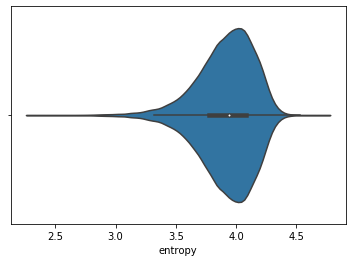

In [191]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=ent_1)

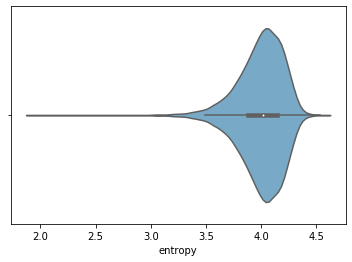

In [188]:
ax = sns.violinplot(x=ent_0, palette="Blues")

### Textstat feature generations

In [193]:
pip install textstat

     |████████████████████████████████| 102 kB 1.6 MB/s ta 0:00:011
     |████████████████████████████████| 1.9 MB 10.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [194]:
#Source: https://pypi.org/project/textstat/
#idea for using text readability ini review analysis -- literature: https://internet.psych.wisc.edu/wp-content/uploads/532-Master/532-UnitPages/Unit-10/Singh_JBR_2017.pdf

import textstat

In [202]:
#Define functions for generating textstat text complexity/readability scores

def flesch(text):
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    return flesch_reading_ease

In [203]:
#process reviewText 
dft['flesch_reading_ease'] = dft['reviewText'].apply(flesch)

In [204]:
#Define functions for generating textstat text complexity/readability scores


def difficult_words(text):
    difficult_words = textstat.difficult_words(text)
    return difficult_words

In [205]:
#process reviewText 

dft['difficult_words'] = dft['reviewText'].apply(difficult_words)

In [206]:
#Define functions for generating textstat text complexity/readability scores

def text_standard(text):
    text_standard = textstat.text_standard(text)
    return text_standard

In [207]:
#process reviewText 
dft['text_standard'] = dft['reviewText'].apply(text_standard)

In [208]:
dft.head()

,Unnamed: 0,asin,reviewText,overall_avg,Target,entropy,flesch_reading_ease,difficult_words,text_standard
0,0,000254CDA01E5AE839E7EE3F6FC1D2F1,The child who recieved them opened the box and...,4.625000,1,4.355374,89.68,27,6th and 7th grade
1,1,0002E81AED1B9840434EE28E39876BE4,Great gift for my special needs cousin Blocks ...,2.538462,0,4.318150,75.44,29,9th and 10th grade
2,2,0003806D9BE7957D8AB9AF9EC04F52D0,I needed something to occupy kids indoors that...,5.000000,1,4.355224,84.88,31,4th and 5th grade
3,3,00049B538C925B3EF702FFF6FBD48DFE,This is a very nicely detailed and painted die...,4.625000,1,4.347877,83.05,17,5th and 6th grade
4,4,0004D0377FDC88F2DD349170E36324E7,Cute This bear is so cool and cute. The fabric...,5.000000,1,4.338061,82.54,15,5th and 6th grade


In [ ]:
#Source: https://pypi.org/project/textstat/

# textstat.smog_index(test_data)
# textstat.flesch_kincaid_grade(test_data)
# textstat.coleman_liau_index(test_data)
# textstat.automated_readability_index(test_data)
# textstat.dale_chall_readability_score(test_data)
# textstat.difficult_words(test_data)
# textstat.linsear_write_formula(test_data)
# textstat.gunning_fog(test_data)
# textstat.text_standard(test_data)

In [215]:
# fit the count vectorizer using the text data
textStat = dft[['flesch_reading_ease', 'difficult_words']]

#.fit_transform(dft['reviewText'])

In [216]:
# split traning data and testing data
X_train, X_test, y_train, y_test = train_test_split(textStat, dft['Target'], test_size=0.2, random_state=1)

In [217]:
#Import model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import metrics
#Create a Classifier
clf2 = LogisticRegression(C=1, penalty='l1', solver='liblinear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test)
# print(y_pred)
print("LASSO-LR Accuracy:",metrics.accuracy_score(y_test, y_pred2))
# print(clf.decision_function(X_test))
# print(clf.predict_proba(X_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

LASSO-LR Accuracy: 0.555775944144716
              precision    recall  f1-score   support

           0       0.57      0.13      0.21      5774
           1       0.55      0.92      0.69      6830

    accuracy                           0.56     12604
   macro avg       0.56      0.52      0.45     12604
weighted avg       0.56      0.56      0.47     12604



### Visualizing textStats

(0, 250)

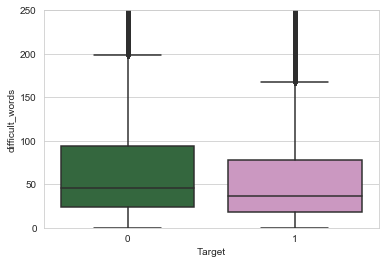

In [263]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Target', y = 'difficult_words', data = dft, palette="cubehelix")
plt.ylim(0, 250)

(0, 130)

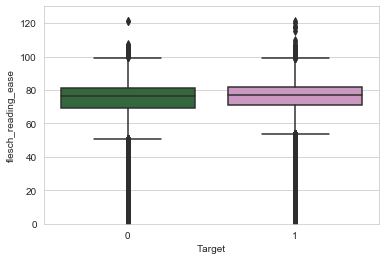

In [268]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Target', y = 'flesch_reading_ease', data = dft, palette="cubehelix")
plt.ylim(0, 130)

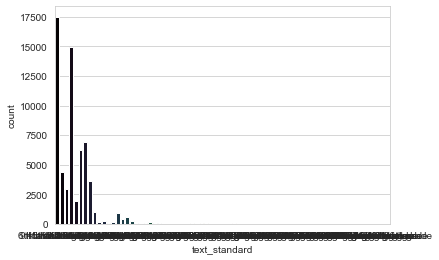

In [273]:
sns.set_style("whitegrid") 
  
sns.countplot('text_standard', data = dft, palette="cubehelix")